In [520]:
# No warnings
import warnings
warnings.filterwarnings('ignore') # Filter out warnings

# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/INFO_290/ML_model

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/My Drive/INFO_290/ML_model'
/content/gdrive/My Drive/INFO_290/ML_model


In [521]:
!ls

1365_XRP_comments_and_submissions.csv  Ripple.csv
binance.csv			       wiki_views.csv
coinbase.csv			       XRP_coimetrics_data.csv
CoinBase.csv			       XRP_comments_and_submissions.csv
google_trendsxrp.csv		       XRP.csv
ML_model.ipynb			       XRP_historical_hourly_price.csv


In [0]:
wiki_views = pd.read_csv('wiki_views.csv') #wikipedia daily views
binance = pd.read_csv('binance.csv')  #google trends data
coinbase = pd.read_csv('coinbase.csv') #google trends data
Coinbase = pd.read_csv('CoinBase.csv')  #reddit subscribers
Ripple = pd.read_csv('Ripple.csv') #reddit subscribers
google_xrp = pd.read_csv('google_trendsxrp.csv') #google trends data
price = pd.read_csv('XRP_historical_hourly_price.csv') #cryptocompare price data (aggregate from different exchanges)
XRP_coimetrics_data = pd.read_csv('XRP_coimetrics_data.csv') #coinmetrics data
XRP = pd.read_csv('XRP.csv') #reddit subscribers

In [523]:
XRP_coimetrics_data

,Unnamed: 0,date,active_adress,FeeMeanXRP,FeeMedXRP,FeeTotXRP,PriceBTC,PriceUSD,ROI1yr,ROI30d,transactions_count,XRPAdj
0,1461,2017-01-01,1279,0.005988,0.000150,4999.385672,0.000006,0.006308,3.414060,-4.598658,834832,2467.130626
1,1462,2017-01-02,1633,0.007085,0.000150,6403.432368,0.000006,0.006270,5.867797,-4.066500,903815,2407.603861
2,1463,2017-01-03,1913,0.007513,0.000165,6292.742040,0.000006,0.006424,7.643177,-0.127838,837562,26.640669
3,1464,2017-01-04,1984,0.017283,0.000150,18423.908762,0.000006,0.006479,7.043325,1.578541,1066033,1147.530401
4,1465,2017-01-05,2436,0.028933,0.000150,33362.939893,0.000006,0.006193,4.284547,-7.867746,1153121,475.006288
...,...,...,...,...,...,...,...,...,...,...,...,...
1188,2649,2020-04-03,5383,0.000699,0.000012,617.033498,0.000027,0.179431,-45.829767,-23.484489,883075,134.533875
1189,2650,2020-04-04,4642,0.000542,0.000012,481.312322,0.000026,0.181335,-50.097362,-24.113112,888736,244.264233
1190,2651,2020-04-05,4430,0.000524,0.000012,461.155950,0.000026,0.179386,-49.177926,-26.569213,880811,408.263420
1191,2652,2020-04-06,5958,0.000671,0.000012,644.845275,0.000027,0.196956,-45.578377,-16.850623,961497,112.787252


In [524]:
price 

,Unnamed: 0,time,close,high,low,open,volumefrom,volumeto,date
0,0,1462719600,0.006384,0.006384,0.006354,0.006354,487.08,3.109,2016-05-08 15:00:00
1,1,1462723200,0.006384,0.006384,0.006384,0.006384,0.00,0.000,2016-05-08 16:00:00
2,2,1462726800,0.006384,0.006384,0.006384,0.006384,0.00,0.000,2016-05-08 17:00:00
3,3,1462730400,0.006384,0.006384,0.006384,0.006384,0.00,0.000,2016-05-08 18:00:00
4,4,1462734000,0.006384,0.006384,0.006384,0.006384,0.00,0.000,2016-05-08 19:00:00
...,...,...,...,...,...,...,...,...,...
34012,34012,1585162800,0.160400,0.162100,0.160100,0.161100,17921777.75,2882707.200,2020-03-25 19:00:00
34013,34013,1585166400,0.159900,0.160700,0.159800,0.160400,10404868.38,1667164.580,2020-03-25 20:00:00
34014,34014,1585170000,0.159300,0.160200,0.158800,0.159900,9302164.24,1484368.710,2020-03-25 21:00:00
34015,34015,1585173600,0.161800,0.161900,0.159100,0.159300,13006764.14,2087781.200,2020-03-25 22:00:00


In [525]:
df = coinbase.merge(price[['date','close', 'volumefrom']],how='left',left_on=['date'],right_on=['date'])
df = df.drop('isPartial', axis=1) 
df = df.merge(binance[['date', 'Binance']], how= 'left' ,left_on=['date'],right_on=['date'] )
df = df.merge(google_xrp[['date', 'XRP']], how= 'left' ,left_on=['date'],right_on=['date'] )
df['CoinBase'] = df['Coinbase']

df = df.drop(['Coinbase'],axis=1)
df = df.drop(['day', 'hour','month','year'],axis=1)
df2 = df.copy()
df


,date,close,volumefrom,Binance,XRP,CoinBase
0,2017-01-01 00:00:00,0.006487,4342.13,0.0,37.0,22
1,2017-01-01 01:00:00,0.006498,3056.21,0.0,59.0,26
2,2017-01-01 02:00:00,0.006667,258.00,0.0,39.0,24
3,2017-01-01 03:00:00,0.006563,3194.77,0.0,47.0,24
4,2017-01-01 04:00:00,0.006597,4169.47,0.0,24.0,20
...,...,...,...,...,...,...
26275,2019-12-31 19:00:00,0.190100,1835796.97,61.0,73.0,82
26276,2019-12-31 20:00:00,0.190200,2109093.29,58.0,71.0,75
26277,2019-12-31 21:00:00,0.190800,2267928.71,62.0,75.0,71
26278,2019-12-31 22:00:00,0.191900,2623716.02,55.0,70.0,74


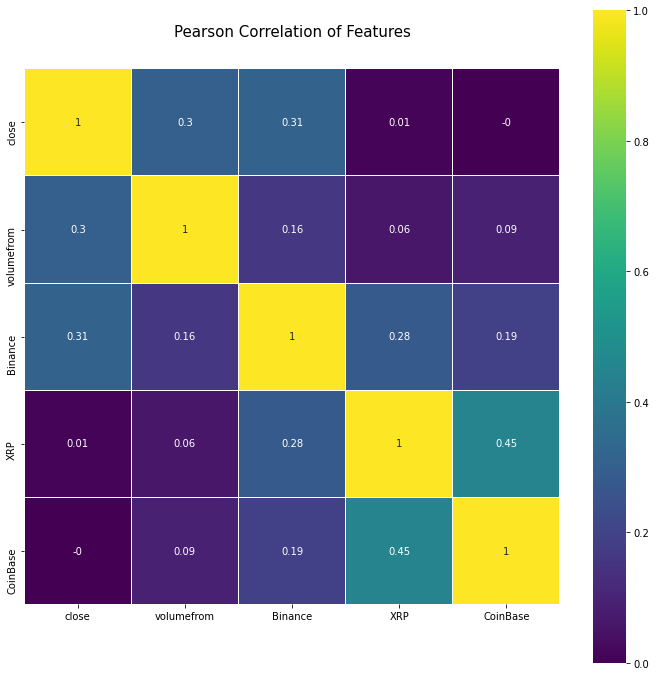

In [526]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, \
            linecolor='white', annot=True);

In [527]:
df['price_up'] = df['close']
df['price_up'][0] = 'NaN'
for i in range(1,len(df)):
  if df['close'][i]>df['close'][i-1]:
    df['price_up'][i]=int(1)
  else:
    df['price_up'][i]=int(0)

df

,date,close,volumefrom,Binance,XRP,CoinBase,price_up
0,2017-01-01 00:00:00,0.006487,4342.13,0.0,37.0,22,NaN
1,2017-01-01 01:00:00,0.006498,3056.21,0.0,59.0,26,1.0
2,2017-01-01 02:00:00,0.006667,258.00,0.0,39.0,24,1.0
3,2017-01-01 03:00:00,0.006563,3194.77,0.0,47.0,24,0.0
4,2017-01-01 04:00:00,0.006597,4169.47,0.0,24.0,20,1.0
...,...,...,...,...,...,...,...
26275,2019-12-31 19:00:00,0.190100,1835796.97,61.0,73.0,82,1.0
26276,2019-12-31 20:00:00,0.190200,2109093.29,58.0,71.0,75,1.0
26277,2019-12-31 21:00:00,0.190800,2267928.71,62.0,75.0,71,1.0
26278,2019-12-31 22:00:00,0.191900,2623716.02,55.0,70.0,74,1.0


In [0]:
df['vol_norm']=(df['volumefrom']-df['volumefrom'].mean())/df['volumefrom'].std()


In [529]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26280 entries, 0 to 26279
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        26280 non-null  object 
 1   close       26280 non-null  float64
 2   volumefrom  26280 non-null  float64
 3   Binance     24601 non-null  float64
 4   XRP         26113 non-null  float64
 5   CoinBase    26280 non-null  int64  
 6   price_up    26279 non-null  float64
 7   vol_norm    26280 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.1+ MB


In [0]:
df = df.fillna(df.mean())

In [531]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26280 entries, 0 to 26279
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        26280 non-null  object 
 1   close       26280 non-null  float64
 2   volumefrom  26280 non-null  float64
 3   Binance     26280 non-null  float64
 4   XRP         26280 non-null  float64
 5   CoinBase    26280 non-null  int64  
 6   price_up    26280 non-null  float64
 7   vol_norm    26280 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.8+ MB


In [532]:
df = df.drop(['volumefrom', 'date', 'close'], axis=1)
df['price_up'][0] = 0
df

,Binance,XRP,CoinBase,price_up,vol_norm
0,0.0,37.0,22,0.0,-0.612479
1,0.0,59.0,26,1.0,-0.612678
2,0.0,39.0,24,1.0,-0.613113
3,0.0,47.0,24,0.0,-0.612657
4,0.0,24.0,20,1.0,-0.612505
...,...,...,...,...,...
26275,61.0,73.0,82,1.0,-0.327837
26276,58.0,71.0,75,1.0,-0.285362
26277,62.0,75.0,71,1.0,-0.260676
26278,55.0,70.0,74,1.0,-0.205380


In [533]:
columns = df.drop('price_up',axis=1).columns
for col in columns:
  df[col]=(df[col]-df[col].mean())/df[col].std()
df

,Binance,XRP,CoinBase,price_up,vol_norm
0,-1.713145,-0.984707,-1.706920,0.0,-0.612479
1,-1.713145,0.178764,-1.492779,1.0,-0.612678
2,-1.713145,-0.878937,-1.599849,1.0,-0.613113
3,-1.713145,-0.455857,-1.599849,0.0,-0.612657
4,-1.713145,-1.672213,-1.813990,1.0,-0.612505
...,...,...,...,...,...
26275,0.602458,0.919154,1.505197,1.0,-0.327837
26276,0.488576,0.813384,1.130450,1.0,-0.285362
26277,0.640419,1.024924,0.916309,1.0,-0.260676
26278,0.374694,0.760499,1.076915,1.0,-0.205380


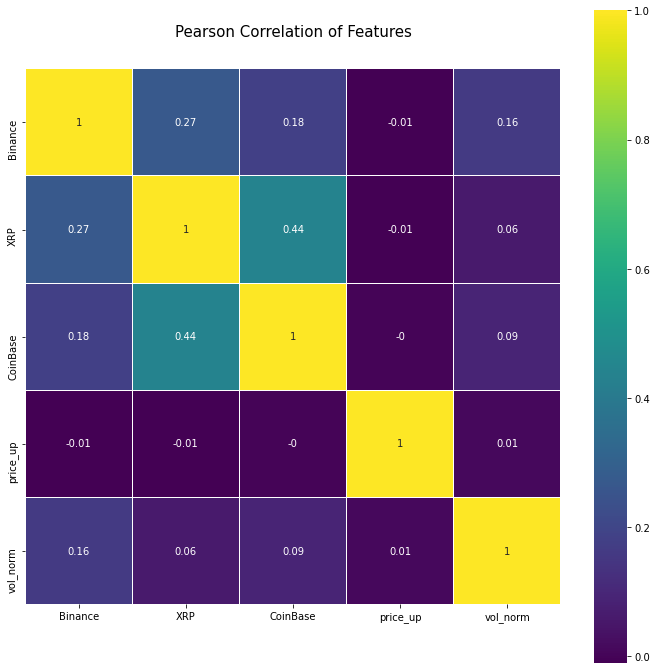

In [534]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, \
            linecolor='white', annot=True);

In [535]:
print(len(df)*0.15)
k = int(len(df)*0.15)
test = df[-k:]
train = df[:(len(df)-2*k)]
valid = df[(len(df)-2*k):(len(df)-k)]
print(train,valid,test)

3942.0
        Binance       XRP  CoinBase  price_up  vol_norm
0     -1.713145 -0.984707 -1.706920       0.0 -0.612479
1     -1.713145  0.178764 -1.492779       1.0 -0.612678
2     -1.713145 -0.878937 -1.599849       1.0 -0.613113
3     -1.713145 -0.455857 -1.599849       0.0 -0.612657
4     -1.713145 -1.672213 -1.813990       1.0 -0.612505
...         ...       ...       ...       ...       ...
18391  1.323712  0.707614 -0.529144       1.0 -0.483296
18392  1.209829  0.390304 -0.689749       0.0 -0.482960
18393  1.551476  0.020109 -0.475608       0.0 -0.491287
18394  1.513515  0.125879 -0.689749       0.0 -0.333136
18395  1.095947  0.813384 -0.582679       0.0 -0.441862

[18396 rows x 5 columns]         Binance       XRP  CoinBase  price_up  vol_norm
18396  0.982065  0.231649 -0.475608       1.0 -0.306294
18397  0.906144  0.284534 -0.207932       0.0 -0.531070
18398  0.792262  0.337419  0.113280       0.0 -0.516915
18399  0.868183  0.443189  0.113280       1.0 -0.104049
18400  0.678380

In [536]:
X_train = train.drop("price_up", axis=1) # Training & Validation data
Y_train = train["price_up"] 
X_val = valid.drop("price_up", axis=1) # Training & Validation data
Y_val = valid["price_up"] 
X_test = test.drop("price_up", axis=1) # Training & Validation data
Y_test = test["price_up"] 
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)

(18396, 4) (18396,)
(3942, 4) (3942,)
(3942, 4) (3942,)


In [537]:
print(Y_train.value_counts())
print(Y_val.value_counts())
print(Y_test.value_counts())

0.0    9599
1.0    8797
Name: price_up, dtype: int64
0.0    2035
1.0    1907
Name: price_up, dtype: int64
0.0    2104
1.0    1838
Name: price_up, dtype: int64


In [538]:
#logistic regression 
logreg = LogisticRegression()                                # instantiate
logreg.fit(X_train, Y_train)                                 # fit
Y_pred = logreg.predict(X_val)                               # predict
acc_logreg = sum(Y_pred == Y_val)/len(Y_val)*100                # evaluate

print('Logistic Regression labeling accuracy:', str(round(acc_logreg,2)),'%')
acc_log_2 = logreg.score(X_val, Y_val)                       # evaluate

print('Logistic Regression using built-in method:', str(round(acc_log_2*100,2)),'%')

Logistic Regression labeling accuracy: 51.57 %
Logistic Regression using built-in method: 51.57 %


In [539]:
#knn 
knn = KNeighborsClassifier(n_neighbors = 3)                  # instantiate
knn.fit(X_train, Y_train)                                    # fit
acc_knn = knn.score(X_val, Y_val)                            # predict + evaluate

print('K-Nearest Neighbors labeling accuracy:', str(round(acc_knn*100,2)),'%')

K-Nearest Neighbors labeling accuracy: 49.42 %


In [540]:
# Support Vector Machines Classifier (non-linear kernel)
svc = SVC()                                                  # instantiate
svc.fit(X_train, Y_train)                                    # fit
acc_svc = svc.score(X_val, Y_val)                            # predict + evaluate

print('Support Vector Machines labeling accuracy:', str(round(acc_svc*100,2)),'%')

Support Vector Machines labeling accuracy: 51.6 %


In [541]:
perceptron = Perceptron()                                    # instantiate 
perceptron.fit(X_train, Y_train)                             # fit
acc_perceptron = perceptron.score(X_val, Y_val)              # predict + evalaute

print('Perceptron labeling accuracy:', str(round(acc_perceptron*100,2)),'%')

Perceptron labeling accuracy: 49.82 %


In [542]:
# XGBoost, same API as scikit-learn
gradboost = xgb.XGBClassifier(n_estimators=1000)             # instantiate
gradboost.fit(X_train, Y_train)                              # fit
acc_xgboost = gradboost.score(X_val, Y_val)                  # predict + evalute

print('XGBoost labeling accuracy:', str(round(acc_xgboost*100,2)),'%')

XGBoost labeling accuracy: 50.23 %


In [543]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=500)   # instantiate
random_forest.fit(X_train, Y_train)                         # fit
acc_rf = random_forest.score(X_val, Y_val)                  # predict + evaluate

print('Random Forest accuracy:', str(round(acc_rf*100,2)),'%')

Random Forest accuracy: 49.75 %


Training accuracy Random Forest: 1.0


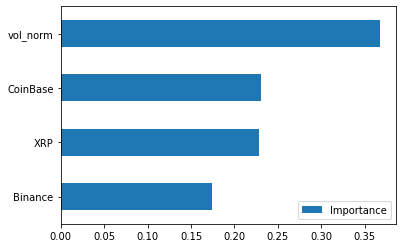

In [544]:
# Look at importnace of features for random forest

def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print ('Training accuracy Random Forest:',model.score( X , y ))

plot_model_var_imp(random_forest, X_train, Y_train)

# Overfitting a looot 

In [545]:
# from datetime import datetime
# type(df2['date'])
df2['date'] = pd.to_datetime(df2['date'])
df2

,date,close,volumefrom,Binance,XRP,CoinBase
0,2017-01-01 00:00:00,0.006487,4342.13,0.0,37.0,22
1,2017-01-01 01:00:00,0.006498,3056.21,0.0,59.0,26
2,2017-01-01 02:00:00,0.006667,258.00,0.0,39.0,24
3,2017-01-01 03:00:00,0.006563,3194.77,0.0,47.0,24
4,2017-01-01 04:00:00,0.006597,4169.47,0.0,24.0,20
...,...,...,...,...,...,...
26275,2019-12-31 19:00:00,0.190100,1835796.97,61.0,73.0,82
26276,2019-12-31 20:00:00,0.190200,2109093.29,58.0,71.0,75
26277,2019-12-31 21:00:00,0.190800,2267928.71,62.0,75.0,71
26278,2019-12-31 22:00:00,0.191900,2623716.02,55.0,70.0,74


In [546]:
# grouping by day and getting the average for each day 
df2 = df2.resample('D', on='date').mean()
df2

,close,volumefrom,Binance,XRP,CoinBase
date,,,,,
2017-01-01,0.006510,1.082510e+04,2.000000,38.625000,20.416667
2017-01-02,0.006342,2.932379e+04,0.000000,45.625000,29.291667
2017-01-03,0.006368,8.058593e+04,2.291667,44.375000,28.833333
2017-01-04,0.006546,4.223395e+04,3.083333,50.833333,41.333333
2017-01-05,0.006146,4.109612e+05,2.416667,55.083333,43.375000
...,...,...,...,...,...
2019-12-27,0.188617,2.907153e+06,76.708333,68.458333,66.083333
2019-12-28,0.192746,2.444936e+06,74.416667,74.166667,65.833333
2019-12-29,0.194279,2.225099e+06,71.875000,77.125000,69.541667


In [547]:
print(Ripple.isnull().sum())
print(Coinbase.isnull().sum())
Ripple['Ripple_new_sub'] = Ripple['subscriber_count']
Coinbase['Coinbase_new_sub'] = Coinbase['subscriber_count']
for i in range(1,len(Ripple)):
  Ripple['Ripple_new_sub'][i] = Ripple['subscriber_count'][i]- Ripple['subscriber_count'][i-1]

for i in range(1,len(Coinbase)):
  Coinbase['Coinbase_new_sub'][i] = Coinbase['subscriber_count'][i]-Coinbase['subscriber_count'][i-1]

Ripple['date'] = pd.to_datetime(Ripple['date'])
Coinbase['date'] = pd.to_datetime(Coinbase['date'])
Coinbase

Unnamed: 0          0
date                0
subscriber_count    0
dtype: int64
Unnamed: 0          0
date                0
subscriber_count    0
dtype: int64


,Unnamed: 0,date,subscriber_count,Coinbase_new_sub
0,0,2013-03-21,2,2
1,1,2013-03-22,2,0
2,2,2013-03-23,2,0
3,3,2013-03-24,2,0
4,4,2013-03-25,2,0
...,...,...,...,...
2557,2557,2020-03-16,46725,18
2558,2558,2020-03-17,46759,34
2559,2559,2020-03-18,46775,16
2560,2560,2020-03-19,46816,41


,date,wiki_ripple,Bitcoin,Ethereum,wiki_coinbase,wiki_binance,Cryptocurrency
0,2016-01-01,41.0,6917.0,350.0,157.0,NaN,722.0
1,2016-01-02,39.0,8377.0,455.0,168.0,NaN,831.0
2,2016-01-03,52.0,10766.0,529.0,168.0,NaN,826.0
3,2016-01-04,65.0,10785.0,712.0,193.0,NaN,1124.0
4,2016-01-05,39.0,10522.0,702.0,325.0,NaN,1190.0
...,...,...,...,...,...,...,...
1536,2020-03-16,49.0,7018.0,4085.0,824.0,1434.0,4240.0
1537,2020-03-17,52.0,6889.0,1731.0,757.0,1425.0,4463.0
1538,2020-03-18,42.0,6672.0,1649.0,766.0,1766.0,5180.0
1539,2020-03-19,39.0,6983.0,1568.0,834.0,1255.0,4781.0


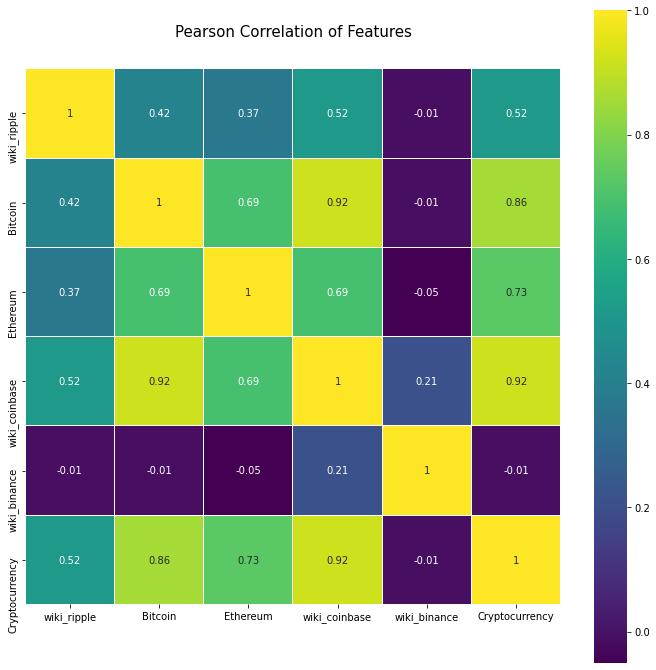

In [548]:
wiki_views = wiki_views.rename(columns={'Unnamed: 0':'date', 'Ripple' : 'wiki_ripple', 'Coinbase':'wiki_coinbase', 'Binance':'wiki_binance'})
wiki_views['date'] = pd.to_datetime(wiki_views['date'])
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(wiki_views.corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, \
            linecolor='white', annot=True);
wiki_views

In [549]:
XRP_coimetrics_data['date'] = pd.to_datetime(XRP_coimetrics_data['date'])
XRP_coimetrics_data

,Unnamed: 0,date,active_adress,FeeMeanXRP,FeeMedXRP,FeeTotXRP,PriceBTC,PriceUSD,ROI1yr,ROI30d,transactions_count,XRPAdj
0,1461,2017-01-01,1279,0.005988,0.000150,4999.385672,0.000006,0.006308,3.414060,-4.598658,834832,2467.130626
1,1462,2017-01-02,1633,0.007085,0.000150,6403.432368,0.000006,0.006270,5.867797,-4.066500,903815,2407.603861
2,1463,2017-01-03,1913,0.007513,0.000165,6292.742040,0.000006,0.006424,7.643177,-0.127838,837562,26.640669
3,1464,2017-01-04,1984,0.017283,0.000150,18423.908762,0.000006,0.006479,7.043325,1.578541,1066033,1147.530401
4,1465,2017-01-05,2436,0.028933,0.000150,33362.939893,0.000006,0.006193,4.284547,-7.867746,1153121,475.006288
...,...,...,...,...,...,...,...,...,...,...,...,...
1188,2649,2020-04-03,5383,0.000699,0.000012,617.033498,0.000027,0.179431,-45.829767,-23.484489,883075,134.533875
1189,2650,2020-04-04,4642,0.000542,0.000012,481.312322,0.000026,0.181335,-50.097362,-24.113112,888736,244.264233
1190,2651,2020-04-05,4430,0.000524,0.000012,461.155950,0.000026,0.179386,-49.177926,-26.569213,880811,408.263420
1191,2652,2020-04-06,5958,0.000671,0.000012,644.845275,0.000027,0.196956,-45.578377,-16.850623,961497,112.787252


In [550]:
df2 = df2.merge(Ripple[['date', 'Ripple_new_sub']], how= 'left' ,left_on=['date'],right_on=['date'] )
df2 = df2.merge(Coinbase[['date', 'Coinbase_new_sub']], how= 'left' ,left_on=['date'],right_on=['date'] )
df2 = df2.merge(wiki_views[['date', 'wiki_ripple', 'wiki_coinbase']], how= 'left' ,left_on=['date'],right_on=['date'] )
df2 = df2.merge(XRP_coimetrics_data[['date', 'active_adress', 'FeeMeanXRP', 'transactions_count', 'ROI30d']], how= 'left' ,left_on=['date'],right_on=['date'] )
#df2['close'] = df2['PriceUSD']
#df2 = df2.drop('PriceUSD', axis =1)
df2

,date,close,volumefrom,Binance,XRP,CoinBase,Ripple_new_sub,Coinbase_new_sub,wiki_ripple,wiki_coinbase,active_adress,FeeMeanXRP,transactions_count,ROI30d
0,2017-01-01,0.006510,1.082510e+04,2.000000,38.625000,20.416667,2,2,43.0,315.0,1279,0.005988,834832,-4.598658
1,2017-01-02,0.006342,2.932379e+04,0.000000,45.625000,29.291667,2,5,68.0,535.0,1633,0.007085,903815,-4.066500
2,2017-01-03,0.006368,8.058593e+04,2.291667,44.375000,28.833333,4,5,62.0,495.0,1913,0.007513,837562,-0.127838
3,2017-01-04,0.006546,4.223395e+04,3.083333,50.833333,41.333333,2,11,53.0,538.0,1984,0.017283,1066033,1.578541
4,2017-01-05,0.006146,4.109612e+05,2.416667,55.083333,43.375000,5,16,66.0,547.0,2436,0.028933,1153121,-7.867746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,2019-12-27,0.188617,2.907153e+06,76.708333,68.458333,66.083333,26,16,50.0,541.0,3936,0.005699,1062464,-15.590821
1094,2019-12-28,0.192746,2.444936e+06,74.416667,74.166667,65.833333,20,8,51.0,543.0,3680,0.000828,1147052,-13.791146
1095,2019-12-29,0.194279,2.225099e+06,71.875000,77.125000,69.541667,22,3,55.0,499.0,3542,0.000695,1188354,-14.577023
1096,2019-12-30,0.194254,3.128968e+06,73.625000,78.875000,74.666667,12,10,34.0,585.0,4179,0.000706,1140554,-14.747366


In [551]:
# filling nans with mean of column
print(df2.info())
df2 = df2.fillna(df2.mean())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098 entries, 0 to 1097
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1098 non-null   datetime64[ns]
 1   close               1098 non-null   float64       
 2   volumefrom          1098 non-null   float64       
 3   Binance             1029 non-null   float64       
 4   XRP                 1092 non-null   float64       
 5   CoinBase            1098 non-null   float64       
 6   Ripple_new_sub      1098 non-null   int64         
 7   Coinbase_new_sub    1098 non-null   int64         
 8   wiki_ripple         1098 non-null   float64       
 9   wiki_coinbase       1098 non-null   float64       
 10  active_adress       1098 non-null   int64         
 11  FeeMeanXRP          1098 non-null   float64       
 12  transactions_count  1098 non-null   int64         
 13  ROI30d              1098 non-null   float64     

In [552]:
# we will be predicting price up or price down 
df2['price_up'] = df2['close']
df2['price_up'][0] = 0
for i in range(1,len(df2)):
  if df2['close'][i]>df2['close'][i-1]:
    df2['price_up'][i]=int(1)
  else:
    df2['price_up'][i]=int(0)
df2

,date,close,volumefrom,Binance,XRP,CoinBase,Ripple_new_sub,Coinbase_new_sub,wiki_ripple,wiki_coinbase,active_adress,FeeMeanXRP,transactions_count,ROI30d,price_up
0,2017-01-01,0.006510,1.082510e+04,2.000000,38.625000,20.416667,2,2,43.0,315.0,1279,0.005988,834832,-4.598658,0.0
1,2017-01-02,0.006342,2.932379e+04,0.000000,45.625000,29.291667,2,5,68.0,535.0,1633,0.007085,903815,-4.066500,0.0
2,2017-01-03,0.006368,8.058593e+04,2.291667,44.375000,28.833333,4,5,62.0,495.0,1913,0.007513,837562,-0.127838,1.0
3,2017-01-04,0.006546,4.223395e+04,3.083333,50.833333,41.333333,2,11,53.0,538.0,1984,0.017283,1066033,1.578541,1.0
4,2017-01-05,0.006146,4.109612e+05,2.416667,55.083333,43.375000,5,16,66.0,547.0,2436,0.028933,1153121,-7.867746,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,2019-12-27,0.188617,2.907153e+06,76.708333,68.458333,66.083333,26,16,50.0,541.0,3936,0.005699,1062464,-15.590821,0.0
1094,2019-12-28,0.192746,2.444936e+06,74.416667,74.166667,65.833333,20,8,51.0,543.0,3680,0.000828,1147052,-13.791146,1.0
1095,2019-12-29,0.194279,2.225099e+06,71.875000,77.125000,69.541667,22,3,55.0,499.0,3542,0.000695,1188354,-14.577023,1.0
1096,2019-12-30,0.194254,3.128968e+06,73.625000,78.875000,74.666667,12,10,34.0,585.0,4179,0.000706,1140554,-14.747366,0.0


In [553]:
df2['vol_norm']=(df2['volumefrom']-df2['volumefrom'].mean())/df2['volumefrom'].std()
df2 = df2.drop(['volumefrom', 'date', 'close'], axis=1)
df2

,Binance,XRP,CoinBase,Ripple_new_sub,Coinbase_new_sub,wiki_ripple,wiki_coinbase,active_adress,FeeMeanXRP,transactions_count,ROI30d,price_up,vol_norm
0,2.000000,38.625000,20.416667,2,2,43.0,315.0,1279,0.005988,834832,-4.598658,0.0,-0.861093
1,0.000000,45.625000,29.291667,2,5,68.0,535.0,1633,0.007085,903815,-4.066500,0.0,-0.857035
2,2.291667,44.375000,28.833333,4,5,62.0,495.0,1913,0.007513,837562,-0.127838,1.0,-0.845789
3,3.083333,50.833333,41.333333,2,11,53.0,538.0,1984,0.017283,1066033,1.578541,1.0,-0.854203
4,2.416667,55.083333,43.375000,5,16,66.0,547.0,2436,0.028933,1153121,-7.867746,0.0,-0.773310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,76.708333,68.458333,66.083333,26,16,50.0,541.0,3936,0.005699,1062464,-15.590821,0.0,-0.225685
1094,74.416667,74.166667,65.833333,20,8,51.0,543.0,3680,0.000828,1147052,-13.791146,1.0,-0.327088
1095,71.875000,77.125000,69.541667,22,3,55.0,499.0,3542,0.000695,1188354,-14.577023,1.0,-0.375316
1096,73.625000,78.875000,74.666667,12,10,34.0,585.0,4179,0.000706,1140554,-14.747366,0.0,-0.177022


In [554]:
#normalizing every column
columns = df2.drop('price_up',axis=1).columns
for col in columns:
  df2[col]=(df2[col]-df2[col].mean())/df2[col].std()
df2

,Binance,XRP,CoinBase,Ripple_new_sub,Coinbase_new_sub,wiki_ripple,wiki_coinbase,active_adress,FeeMeanXRP,transactions_count,ROI30d,price_up,vol_norm
0,-1.764005,-1.053012,-2.277417,-0.299630,-0.325652,-0.412065,-0.579290,-0.827016,-0.043040,0.068239,-0.282119,0.0,-0.861093
1,-1.846009,-0.618007,-1.671657,-0.299630,-0.299764,-0.274888,-0.428433,-0.782079,-0.027429,0.226462,-0.278793,0.0,-0.857035
2,-1.752046,-0.695686,-1.702940,-0.296410,-0.299764,-0.307811,-0.455861,-0.746536,-0.021332,0.074500,-0.254173,1.0,-0.845789
3,-1.719586,-0.294343,-0.849757,-0.299630,-0.247988,-0.357195,-0.426376,-0.737523,0.117767,0.598534,-0.243507,1.0,-0.854203
4,-1.746921,-0.030232,-0.710404,-0.294800,-0.204841,-0.285863,-0.420204,-0.680145,0.283642,0.798284,-0.302553,0.0,-0.773310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,1.299193,0.800938,0.839547,-0.260987,-0.204841,-0.373656,-0.424318,-0.489733,-0.047165,0.590348,-0.350828,0.0,-0.225685
1094,1.205230,1.155674,0.822483,-0.270648,-0.273876,-0.368169,-0.422947,-0.522230,-0.116512,0.784364,-0.339579,1.0,-0.327088
1095,1.101017,1.339515,1.075594,-0.267428,-0.317022,-0.346220,-0.453119,-0.539748,-0.118412,0.879096,-0.344491,1.0,-0.375316
1096,1.172770,1.448267,1.425399,-0.283529,-0.256617,-0.461449,-0.394147,-0.458886,-0.118247,0.769460,-0.345556,0.0,-0.177022


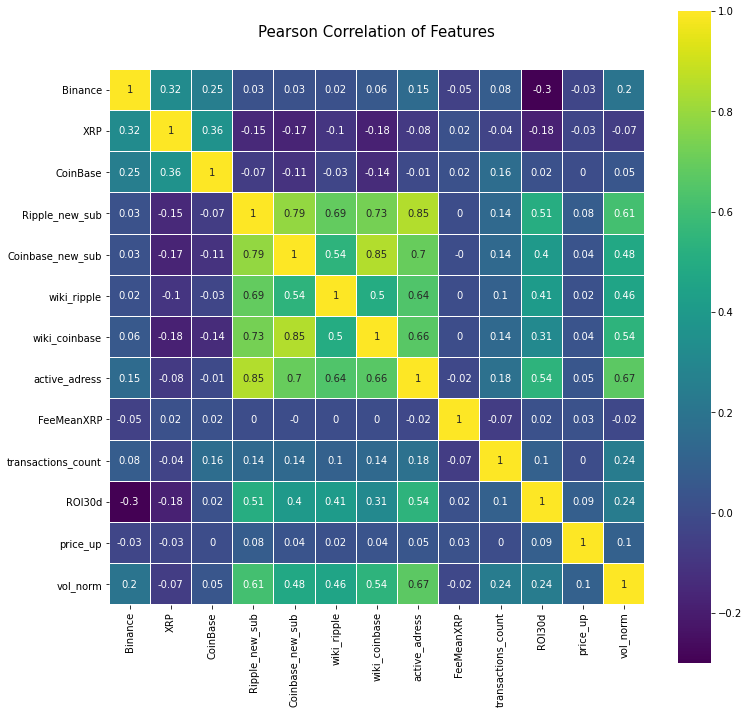

In [555]:
# correlation
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df2.corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, \
            linecolor='white', annot=True);

In [556]:
# train val test
print(len(df2)*0.15)
k = int(len(df2)*0.15)
test = df2[-k:]
train = df2[:(len(df2)-2*k)]
valid = df2[(len(df2)-2*k):(len(df2)-k)]
print(train,valid,test)


164.7
      Binance       XRP  CoinBase  ...    ROI30d  price_up  vol_norm
0   -1.764005 -1.053012 -2.277417  ... -0.282119       0.0 -0.861093
1   -1.846009 -0.618007 -1.671657  ... -0.278793       0.0 -0.857035
2   -1.752046 -0.695686 -1.702940  ... -0.254173       1.0 -0.845789
3   -1.719586 -0.294343 -0.849757  ... -0.243507       1.0 -0.854203
4   -1.746921 -0.030232 -0.710404  ... -0.302553       0.0 -0.773310
..        ...       ...       ...  ...       ...       ...       ...
765 -0.098295 -1.231675 -0.056296  ... -0.337142       1.0 -0.526490
766  0.417648  0.280485 -0.261060  ... -0.355330       0.0 -0.547458
767  0.865254  0.839778  0.105809  ... -0.353667       0.0 -0.632255
768  1.360696  1.106477  0.634783  ... -0.372598       0.0 -0.669246
769  1.060014  0.987368  0.492585  ... -0.384817       0.0 -0.450943

[770 rows x 13 columns]       Binance       XRP  CoinBase  ...    ROI30d  price_up  vol_norm
770  0.851587  0.844956  0.492585  ... -0.383094       1.0 -0.636460
771

In [557]:
X_train = train.drop("price_up", axis=1) # Training & Validation data
Y_train = train["price_up"] 
X_val = valid.drop("price_up", axis=1) # Training & Validation data
Y_val = valid["price_up"] 
X_test = test.drop("price_up", axis=1) # Training & Validation data
Y_test = test["price_up"] 
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)
print(Y_train.value_counts())
print(Y_val.value_counts())
print(Y_test.value_counts())

(770, 12) (770,)
(164, 12) (164,)
(164, 12) (164,)
0.0    412
1.0    358
Name: price_up, dtype: int64
0.0    85
1.0    79
Name: price_up, dtype: int64
0.0    92
1.0    72
Name: price_up, dtype: int64


In [570]:
#logistic regression 
logreg = LogisticRegression()                                # instantiate
logreg.fit(X_train, Y_train)                                 # fit
Y_pred = logreg.predict(X_val)                               # predict
acc_logreg = sum(Y_pred == Y_val)/len(Y_val)*100                # evaluate

print('Logistic Regression validation set:', str(round(acc_logreg,2)),'%')
acc_log_2 = logreg.score(X_train, Y_train)                       # evaluate

print('Logistic Regression on the training set:', str(round(acc_log_2*100,2)),'%')

Logistic Regression validation set: 53.05 %
Logistic Regression on the training set: 58.57 %


In [559]:
#knn 
knn = KNeighborsClassifier(n_neighbors = 3)                  # instantiate
knn.fit(X_train, Y_train)                                    # fit
acc_knn = knn.score(X_val, Y_val)                            # predict + evaluate

print('K-Nearest Neighbors labeling accuracy:', str(round(acc_knn*100,2)),'%')

K-Nearest Neighbors labeling accuracy: 51.22 %


In [560]:
# Support Vector Machines Classifier (non-linear kernel)
svc = SVC()                                                  # instantiate
svc.fit(X_train, Y_train)                                    # fit
acc_svc = svc.score(X_val, Y_val)                            # predict + evaluate

print('Support Vector Machines labeling accuracy:', str(round(acc_svc*100,2)),'%')

Support Vector Machines labeling accuracy: 51.83 %


In [561]:
perceptron = Perceptron()                                    # instantiate 
perceptron.fit(X_train, Y_train)                             # fit
acc_perceptron = perceptron.score(X_val, Y_val)              # predict + evalaute

print('Perceptron labeling accuracy:', str(round(acc_perceptron*100,2)),'%')

Perceptron labeling accuracy: 54.88 %


In [562]:
# XGBoost, same API as scikit-learn
gradboost = xgb.XGBClassifier(n_estimators=1000)             # instantiate
gradboost.fit(X_train, Y_train)                              # fit
acc_xgboost = gradboost.score(X_val, Y_val)                  # predict + evalute

print('XGBoost labeling accuracy:', str(round(acc_xgboost*100,2)),'%')

XGBoost labeling accuracy: 56.1 %


In [0]:
# Random Forest with cross-validation
acc_rf = []
for i in range(1,500):
  np.random_seed = 42
  random_forest = RandomForestClassifier(n_estimators=i, random_state=42)   # instantiate
  random_forest.fit(X_train, Y_train)                         # fit
  acc_rf.append(random_forest.score(X_val, Y_val))                 # predict + evaluate

#print('Random Forest accuracy:', str(round(acc_rf*100,2)),'%')

0.6219512195121951


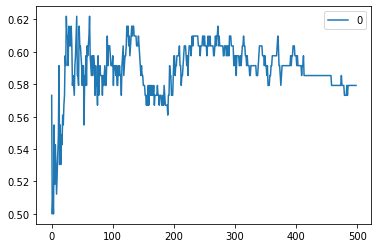

In [564]:
acc_rf = pd.DataFrame(acc_rf)
acc_rf.plot()
print(max(acc_rf[0]))

In [565]:
acc_rf.idxmax()

0    24
dtype: int64

Training accuracy Random Forest: 0.9987012987012988


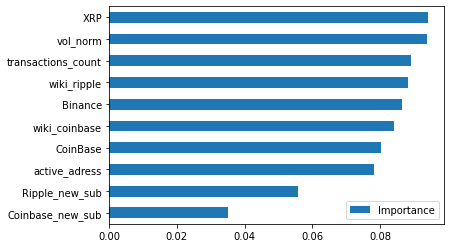

In [567]:
# Look at importnace of features for random forest

np.random_seed = 42
random_forest = RandomForestClassifier(n_estimators=24, random_state=42)   # instantiate
random_forest.fit(X_train, Y_train)                         # fit


def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print ('Training accuracy Random Forest:',model.score( X , y ))

plot_model_var_imp(random_forest, X_train, Y_train)

# Looks like it's overfitting, strange cause the number of variables is not that big compared to the # of observations
# i would expect the other models to be overfitting as well, while by looking at the logistic regression model we notice it's not overfitting